In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [2]:
# Step 2: Dataset Configuration
dataset_dir = 'C:/Users/jahid/Desktop/ML/CNN_dataset'  # Folder containing subfolders for each category
categories = ['AbdomenCT', 'ChestCT', 'CXR', 'HandCT', 'HeadCT']
img_size = 128
batch_size = 32

In [3]:
# Step 3: Data Augmentation and Generators
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # Split: 70% train, 30% validation/test
)

In [4]:
# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True  # Shuffle training data
)

Found 35000 images belonging to 5 classes.


In [5]:
# Validation data generator
val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True  # Shuffle validation data
)

Found 15000 images belonging to 5 classes.


In [7]:
# Define the CNN model
model = Sequential([
    Input(shape=(img_size, img_size, 3)),  # Input layer
    Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),  # Third convolutional layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),  # Flatten the 3D output to 1D for the dense layers
    Dense(128, activation='relu'),  # Fully connected layer
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,693 (12.61 MB)

 Trainable params: 3,305,989 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [10]:
# Step 5: Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)

C:\Users\jahid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9591 - loss: 0.1266

C:\Users\jahid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1379s 1s/step - accuracy: 0.9591 - loss: 0.1265 - val_accuracy: 0.9704 - val_loss: 0.0936
Epoch 2/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1091s 998ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.8883 - val_loss: 0.1880
Epoch 3/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 961s 879ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9987 - val_loss: 0.0058
Epoch 4/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 859s 785ms/step - accuracy: 0.9949 - loss: 0.0152 - val_accuracy: 0.9971 - val_loss: 0.0079
Epoch 5/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 861s 787ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.8118 - val_loss: 0.5585
Epoch 6/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 858s 784ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9978 - val_loss: 0.0060
Epoch 7/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 873s 798ms/step - accuracy: 0.9967 - loss: 0.0092 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 8/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 898s 821ms/step - accuracy: 0.99

In [11]:
# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(val_generator, verbose=2)  # Using validation data as test
print(f"Test Accuracy: {test_accuracy:.2f}")

469/469 - 102s - 217ms/step - accuracy: 0.9993 - loss: 0.0018
Test Accuracy: 1.00


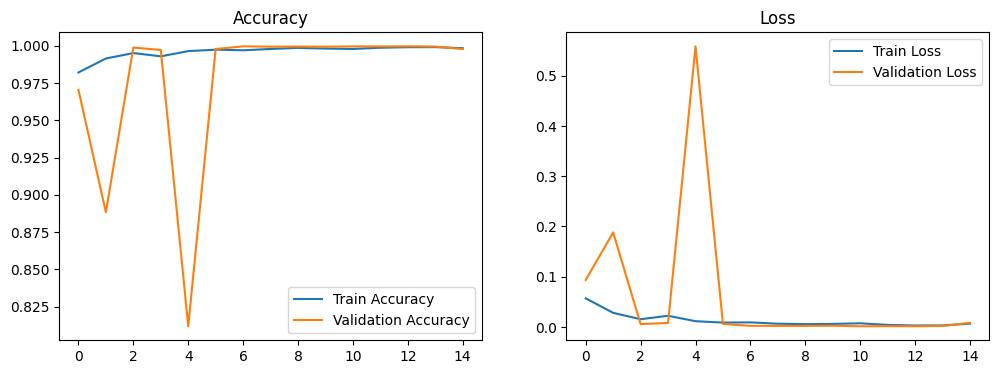

In [12]:
# Step 7: Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [13]:
# Step 8: Save the Model
model.save("medical_image_classifier.h5")